In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_124627 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_125226 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_125656 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_125157 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/20211109_121933 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_125339 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_115649 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/20211109_122151(0) (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/20211109_122241 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_130039 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/20211109_121859 (Custom).jpg
/kaggle/input/mango-leaf-disease-d

In [2]:
import glob as gb
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Here I have built an improved CNN model with hyperparameter tuning to achieve better performance. The hyperparameter tuned are number epochs and additional convolutional layer.

In [3]:
disease_class = ['Healthy', 'Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Powdery Mildew', 'Sooty Mould']
#Size of the image 
img_size = 100
#Create list to keep matrix and corresponding label
X = []
y = []
#Class id has been assigned for each disease class
class_id = {disease_class[i]: i for i in range(len(disease_class))}
for i, disease in enumerate(disease_class):
    img_path = '/kaggle/input/mango-leaf-disease-dataset/' + disease + '/'
    for img in os.listdir(img_path):
        img_ary = cv2.imread(os.path.join(img_path,img), cv2.IMREAD_GRAYSCALE)
        img_ary = cv2.resize(img_ary, (img_size, img_size))
        X.append(img_ary)
        y.append(class_id[disease])

# Preprocessing the data
X = np.array(X) / 255.0
#One-hot encode the classes label
y = to_categorical(y, num_classes=8)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building CNN
Classifier = Sequential()
Classifier.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
Classifier.add(MaxPooling2D((2, 2)))
Classifier.add(Conv2D(32, (3, 3), activation='relu'))
Classifier.add(MaxPooling2D((2, 2)))
#Added Convolutional layer
Classifier.add(Conv2D(64, (3, 3), activation='relu'))
Classifier.add(MaxPooling2D((2, 2)))
#Flattening
Classifier.add(Flatten())
#Full Connection
Classifier.add(Dense(64, activation='relu'))
Classifier.add(Dense(8, activation='softmax'))

# Compiling the CNN using adam optimize
Classifier.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Train the model with increased number of epoch
Classifier.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
88/88 [==============================] - 16s 164ms/step - loss: 1.8599 - accuracy: 0.2718 - val_loss: 1.5540 - val_accuracy: 0.3633
Epoch 2/15
88/88 [==============================] - 14s 164ms/step - loss: 1.3057 - accuracy: 0.4982 - val_loss: 1.2247 - val_accuracy: 0.5142
Epoch 3/15
88/88 [==============================] - 14s 159ms/step - loss: 1.1151 - accuracy: 0.5836 - val_loss: 1.1227 - val_accuracy: 0.5850
Epoch 4/15
88/88 [==============================] - 14s 162ms/step - loss: 0.9261 - accuracy: 0.6668 - val_loss: 1.0154 - val_accuracy: 0.6067
Epoch 5/15
88/88 [==============================] - 14s 157ms/step - loss: 0.7817 - accuracy: 0.7279 - val_loss: 0.9043 - val_accuracy: 0.6783
Epoch 6/15
88/88 [==============================] - 14s 163ms/step - loss: 0.6653 - accuracy: 0.7743 - val_loss: 0.8894 - val_accuracy: 0.6783
Epoch 7/15
88/88 [==============================] - 14s 158ms/step - loss: 0.6202 - accuracy: 0.7843 - val_loss: 0.9641 - val_accuracy: 0.6567

In [4]:
Classifier.save('model.h5')


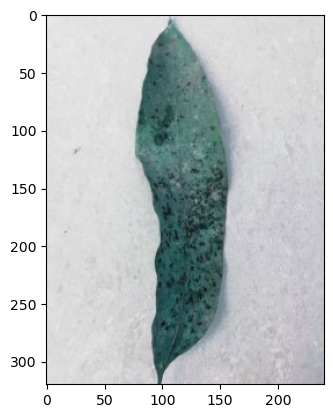

1/1 [==============================] - 0s 128ms/step
The predicted disease for given image is: Sooty Mould


In [5]:
#To check how well our model perform after hyperparameter tuning I'll give a sample image from original dataset and predict the disease class.
import cv2
from keras.models import load_model
model = load_model('model.h5')

# Load an example image
import matplotlib.pyplot as plt
# Load the input image
img = cv2.imread('/kaggle/input/mango-leaf-disease-dataset/Sooty Mould/IMG_20211108_120225 (Custom).jpg')
plt.imshow(img)
plt.show()
# Convert the image to grayscale and resize it to fit the model input shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (100, 100))

# Add an extra dimension for the channel (grayscale image)
img = np.expand_dims(img, axis=-1)

# Make a prediction
prediction = model.predict(np.array([img]))
class_index = np.argmax(prediction)

# Get the predicted class
predicted_class = disease_class[class_index]
print(f"The predicted disease for given image is: {predicted_class}")
